## 7주차 회귀분석 
### 9.5 사이파이를 사용한 검정

#### 이항검정

In [3]:
import scipy as sp
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [4]:
sp.stats.binom_test(n, N)

0.3437499999999999

In [5]:
N = 100
mu_0 = 0.35
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

32

In [7]:
sp.stats.binom_test(n, N)

0.0004087771674268151

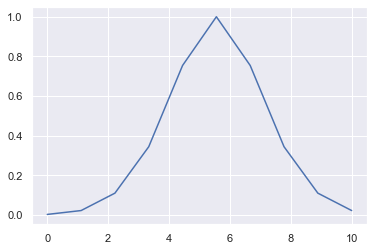

In [15]:
# 연습문제 9.5.1
N = 10
mu_0 = 0.5
p_value = []
for i in range(N):
#     x = sp.stats.bernoulli(mu_0).rvs(i+1)
#     p_value.append(np.count_nonzero(x))
    p_value.append(sp.stats.binom_test(i, N))
xx = np.linspace(0, 10, 10)
plt.plot(xx, p_value)
plt.show()

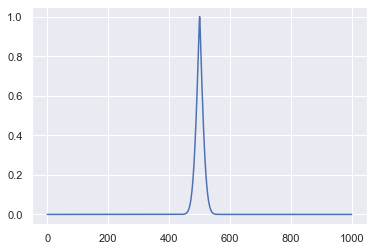

In [16]:
N = 1000
mu_0 = 0.5
p_value = []
for i in range(N):
    p_value.append(sp.stats.binom_test(i, N))
xx = np.linspace(0, N, N)
plt.plot(xx, p_value)
plt.show()

In [17]:
# 연습문제 9.5.2
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips.shape

(244, 7)

In [22]:
tips['count'] = 1

In [26]:
tips.pivot_table(values = 'count', index = 'sex', columns = 'smoker', aggfunc = sum, margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [27]:
sp.stats.binom_test(33, 87)
# 귀무가설: 여자 손님 중 비흡연자와 흡연자가 같다
# 10% 유의수준 하에서 귀무가설은 기각된다.

0.031418110233846136

In [33]:
# 귀무가설: 저녁에 오는 여자 손님 중 비흡연자와 흡연자는 같다.
tips_female = tips[tips['sex'] == 'Female']
tips_female.pivot_table(values = 'count', index = 'time', columns = 'smoker', aggfunc = sum, margins=True)

smoker,Yes,No,All
time,,,
Lunch,10,25,35
Dinner,23,29,52
All,33,54,87


In [35]:
sp.stats.binom_test(23, 52)

0.4884556693798922

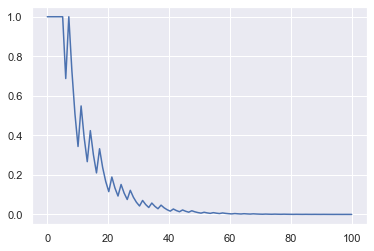

In [41]:
# 연습문제 9.5.3
# 응답자의 70%가 찬성
# 귀무가설: 전체 국민의 2/3가 찬성한다.
N = 20
n = 0.7 * N
p_value = []
for i in range(100):
    p_value.append(sp.stats.binom_test(0.7*i, i))
xx = np.linspace(0, 100, 100)
plt.plot(xx, p_value)
plt.show()
    

#### 카이제곱 검정 

In [44]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [45]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [46]:
# 연습문제 9.5.4
N = 5
K = 6
mu_0 = np.ones(K)/K
n = np.array([0, 0, 0, 0, 0, 5])

In [48]:
sp.stats.chisquare([0, 0, 0, 0, 0, 5])

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

#### 카이제곱 독립검정

In [50]:
# 연습문제 9.5.5
obs = np.array([[4, 16, 20], [23, 18, 19]])
sp.stats.chi2_contingency(obs)
# 결론: 상관관계가 있다.

(9.910060890453046,
 0.00704786570249751,
 2,
 array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

#### 독립표본 t검정

In [52]:
# 연습문제 9.5.6
# N_1 = 12
# mu_1 = 74.1
# sigma_1 = 1
# N_2 = 7
# mu_2 = 69.2
# sigma_2 = 1
# x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
# x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
x1 = [80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80]
x2 = [80, 85, 70, 80, 35, 55, 80]
sp.stats.ttest_ind(x1, x2, equal_var = True)

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

In [53]:
sp.stats.ttest_ind(x1, x2, equal_var = False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

In [54]:
# 귀무가설: 1반과 2반의 점수가 같다
# 귀무가설을 기각할 수 없다. 